Analysis borrowed from lifelines documentation https://lifelines.readthedocs.io/en/latest/Survival%20Regression.html

In [1]:
from lifelines import WeibullAFTFitter
from lifelines.datasets import load_rossi

In [2]:
rossi = load_rossi()

In [3]:
aft = WeibullAFTFitter()
aft.fit(rossi, duration_col='week', event_col='arrest')

<lifelines.WeibullAFTFitter: fitted with 432 total observations, 318 right-censored observations>

In [7]:
aft.print_summary()

<lifelines.WeibullAFTFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
   number of observations = 432
number of events observed = 114
           log-likelihood = -679.92
         time fit was run = 2021-02-07 16:06:09 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                         
lambda_ age         0.04       1.04       0.02             0.01             0.07                 1.01                 1.07
        fin         0.27       1.31       0.14             0.00             0.54                 1.00                 1.72
        mar         0.31       1.37       0.27            -0.22             0.85                 0.80                 2.33
        paro        0.06       1.06       0.14            -0.21             0.33                 0.81                 1.39
        prio       -0.07       0.94       0.02            -0.11            -0.02                 0.90                 0.98
        race       -0.22       0.80       0.22            -0.66             0.21                 0.52                 1.23
        wexp        0.11       1.11       0.15            -0.19             0.40                 0.83                 1.50
        Intercept   3.99      54.06       0.42             3.17             4.81                23.78               122.92
rho_    Intercept   0.34       1.40       0.09             0.16             0.51                 1.18                 1.67

                      z      p   -log2(p)
param   covariate                        
lambda_ age        2.54   0.01       6.51
        fin        1.97   0.05       4.37
        mar        1.14   0.25       1.97
        paro       0.42   0.67       0.57
        prio      -3.14 <0.005       9.22
        race      -1.02   0.31       1.70
        wexp       0.70   0.48       1.05
        Intercept  9.52 <0.005      68.98
rho_    Intercept  3.81 <0.005      12.81
---
Concordance = 0.64
AIC = 1377.83
log-likelihood ratio test = 33.42 on 7 df
-log2(p) of ll-ratio test = 15.46

From the lifelines documentation https://lifelines.readthedocs.io/en/latest/Survival%20Regression.html

> From above, we can see that prio, which is the number of previous incarcerations, has a large negative coefficient. This means that each addition incarcerations changes a subject’s mean/median survival time by $e^{−0.06} = 0.94$, approximately a 6% decrease in mean/median survival time. What is the mean/median survival time?

In [9]:
print(aft.median_survival_time_)
print(aft.mean_survival_time_)

100.53197620303878
118.91680764274982


From the lifelines documentation https://lifelines.readthedocs.io/en/latest/Survival%20Regression.html

> What does the rho_    _intercept row mean in the above table? Internally, we model the log of the rho_ parameter, so the value of 𝜌 is the exponential of the value, so in case above it’s $\hat{\rho} = e^{0.34} = 1.40$. This brings us to the next point - modelling $\rho$ with covariates as well:

In [10]:
aft.fit(rossi, duration_col='week', event_col='arrest', ancillary=True)
aft.print_summary()

<lifelines.WeibullAFTFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
   number of observations = 432
number of events observed = 114
           log-likelihood = -669.40
         time fit was run = 2021-02-07 16:13:11 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                         
lambda_ age         0.10       1.10       0.03             0.04             0.16                 1.04                 1.17
        fin         0.24       1.28       0.15            -0.06             0.55                 0.95                 1.73
        mar         0.26       1.30       0.30            -0.33             0.85                 0.72                 2.35
        paro        0.09       1.10       0.15            -0.21             0.39                 0.81                 1.48
        prio       -0.08       0.92       0.02            -0.12            -0.04                 0.89                 0.96
        race        0.07       1.07       0.19            -0.30             0.44                 0.74                 1.55
        wexp       -0.34       0.71       0.15            -0.64            -0.04                 0.53                 0.96
        Intercept   2.68      14.65       0.60             1.51             3.85                 4.55                47.22
rho_    age        -0.05       0.95       0.02            -0.08            -0.02                 0.93                 0.98
        fin        -0.01       0.99       0.15            -0.31             0.29                 0.73                 1.33
        mar         0.10       1.10       0.27            -0.44             0.63                 0.65                 1.87
        paro        0.02       1.02       0.16            -0.29             0.33                 0.75                 1.39
        prio        0.03       1.03       0.02            -0.01             0.08                 0.99                 1.08
        race       -0.46       0.63       0.25            -0.95             0.04                 0.39                 1.04
        wexp        0.56       1.74       0.17             0.23             0.88                 1.26                 2.42
        Intercept   1.48       4.41       0.41             0.68             2.29                 1.97                 9.89

                      z      p   -log2(p)
param   covariate                        
lambda_ age        3.43 <0.005      10.69
        fin        1.60   0.11       3.18
        mar        0.86   0.39       1.35
        paro       0.61   0.54       0.88
        prio      -4.24 <0.005      15.46
        race       0.36   0.72       0.48
        wexp      -2.22   0.03       5.26
        Intercept  4.50 <0.005      17.14
rho_    age       -3.10 <0.005       9.01
        fin       -0.09   0.92       0.11
        mar        0.36   0.72       0.47
        paro       0.12   0.90       0.15
        prio       1.44   0.15       2.73
        race      -1.79   0.07       3.77
        wexp       3.32 <0.005      10.13
        Intercept  3.60 <0.005      11.62
---
Concordance = 0.64
AIC = 1370.80
log-likelihood ratio test = 54.45 on 14 df
-log2(p) of ll-ratio test = 19.83

<AxesSubplot:xlabel='log(accelerated failure rate) (95% CI)'>

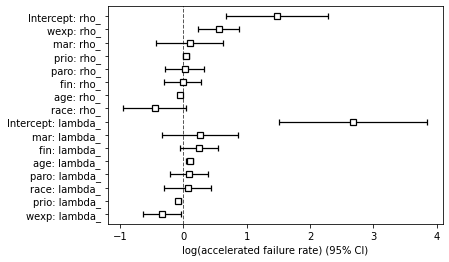

In [12]:
aft.plot()

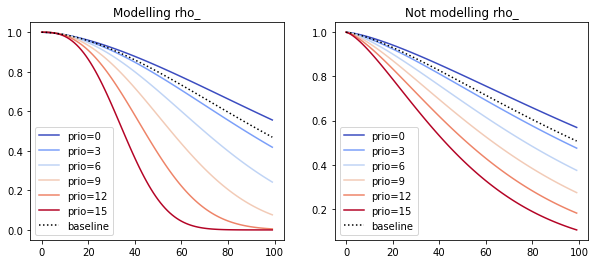

In [15]:
import pylab
fig, ax = pylab.subplots(nrows=1, ncols=2, figsize=(10, 4))

times = pylab.arange(0, 100)
wft_model_rho = WeibullAFTFitter().fit(rossi, 'week', 'arrest', ancillary=True, timeline=times)
wft_model_rho.plot_partial_effects_on_outcome('prio', range(0, 16, 3), cmap='coolwarm', ax=ax[0])
ax[0].set_title("Modelling rho_")

wft_not_model_rho = WeibullAFTFitter().fit(rossi, 'week', 'arrest', ancillary=False, timeline=times)
wft_not_model_rho.plot_partial_effects_on_outcome('prio', range(0, 16, 3), cmap='coolwarm', ax=ax[1])
ax[1].set_title("Not modelling rho_");

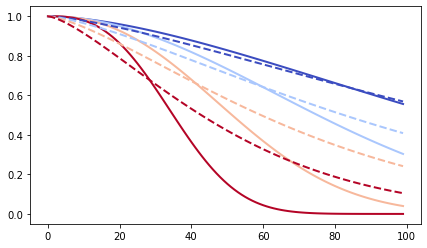

In [16]:
fig, ax = pylab.subplots(nrows=1, ncols=1, figsize=(7, 4))

# modeling rho == solid line
wft_model_rho.plot_partial_effects_on_outcome('prio', range(0, 16, 5), cmap='coolwarm', ax=ax, lw=2, plot_baseline=False)

# not modeling rho == dashed line
wft_not_model_rho.plot_partial_effects_on_outcome('prio', range(0, 16, 5), cmap='coolwarm', ax=ax, ls='--', lw=2, plot_baseline=False)

ax.get_legend().remove()

In [18]:
X = rossi.loc[:10]

aft.predict_cumulative_hazard(X, ancillary=X)


,0,1,2,3,4,5,6,7,8,9,10
1.0,0.009571,0.001719,8.912520e-08,0.000056,5.490625e-07,0.000426,0.000152,0.000085,0.004563,0.000245,0.007177
2.0,0.017610,0.005211,2.810035e-06,0.000205,6.348676e-06,0.001360,0.000484,0.000359,0.010569,0.000906,0.013477
3.0,0.025156,0.009969,2.115444e-05,0.000439,2.657873e-05,0.002681,0.000954,0.000833,0.017274,0.001949,0.019484
4.0,0.032400,0.015795,8.859780e-05,0.000753,7.340818e-05,0.004340,0.001545,0.001514,0.024478,0.003355,0.025309
5.0,0.039427,0.022572,2.690916e-04,0.001145,1.614261e-04,0.006305,0.002244,0.002407,0.032077,0.005115,0.031001
6.0,0.046286,0.030216,6.669799e-04,0.001612,3.073233e-04,0.008556,0.003045,0.003516,0.040007,0.007217,0.036590
7.0,0.053007,0.038667,1.436861e-03,0.002153,5.296784e-04,0.011074,0.003942,0.004843,0.048223,0.009657,0.042094
8.0,0.059614,0.047877,2.793406e-03,0.002767,8.488008e-04,0.013848,0.004929,0.006392,0.056692,0.012427,0.047527
9.0,0.066122,0.057804,5.021143e-03,0.003452,1.286609e-03,0.016866,0.006003,0.008165,0.065389,0.015524,0.052899
10.0,0.072543,0.068417,8.484209e-03,0.004207,1.866531e-03,0.020119,0.007161,0.010163,0.074293,0.018942,0.058216


In [19]:
aft.predict_survival_function(X, ancillary=X)


,0,1,2,3,4,5,6,7,8,9,10
1.0,0.990475,0.998282,9.999999e-01,0.999944,0.999999,0.999574,0.999848,0.999915,0.995447,0.999755,0.992849
2.0,0.982544,0.994803,9.999972e-01,0.999795,0.999994,0.998641,0.999516,0.999641,0.989487,0.999094,0.986613
3.0,0.975157,0.990081,9.999788e-01,0.999561,0.999973,0.997322,0.999046,0.999167,0.982874,0.998053,0.980704
4.0,0.968119,0.984329,9.999114e-01,0.999247,0.999927,0.995669,0.998457,0.998487,0.975819,0.996650,0.975009
5.0,0.961340,0.977681,9.997309e-01,0.998856,0.999839,0.993714,0.997758,0.997596,0.968432,0.994898,0.969475
6.0,0.954769,0.970236,9.993332e-01,0.998389,0.999693,0.991481,0.996960,0.996490,0.960782,0.992809,0.964072
7.0,0.948373,0.962071,9.985642e-01,0.997849,0.999470,0.988987,0.996066,0.995168,0.952921,0.990390,0.958780
8.0,0.942128,0.953251,9.972105e-01,0.997237,0.999152,0.986247,0.995083,0.993628,0.944885,0.987650,0.953585
9.0,0.936017,0.943835,9.949914e-01,0.996554,0.998714,0.983275,0.994015,0.991869,0.936703,0.984596,0.948476
10.0,0.930026,0.933871,9.915517e-01,0.995802,0.998135,0.980082,0.992864,0.989889,0.928400,0.981236,0.943446


In [20]:
aft.predict_median(X, ancillary=X)


0     130.124454
1      42.520188
2      24.215078
3     151.609020
4      53.418856
5      82.856480
6     153.530453
7      76.313313
8      63.161176
9      67.245120
10    152.522148
dtype: float64

In [21]:
aft.predict_percentile(X, p=0.9, ancillary=X)


0     15.284906
1     13.098037
2     16.586447
3     55.586906
4     31.334119
5     26.888573
6     49.829776
7     30.820091
8     13.342154
9     24.804599
10    19.204029
dtype: float64

In [22]:
aft.predict_expectation(X, ancillary=X)

0     210.371924
1      47.937821
2      23.926127
3     163.598112
4      53.345201
5      92.125023
6     170.699338
7      80.636068
8      80.201289
9      72.462424
10    238.862748
dtype: float64